In [27]:
import numpy as np
import pandas as pd
import glob
import os

pd.set_option('display.width', 500) 
pd.set_option('display.max_columns', 100)

%matplotlib inline

In [16]:
#cd

In [11]:
os.chdir('Box Sync\Research\Topic Modeling\WOS')

In [12]:
file_names = glob.glob("*.txt")

In [14]:
#file_names

In [79]:
pieces = []

for path in file_names:
    eo = pd.read_csv(path, sep='\t')
    pieces.append(eo)

articles = pd.concat(pieces, ignore_index=True)

In [80]:
print articles.shape
print articles['SO'].nunique()

(32560, 56)
30


In [81]:
print len(articles)
articles = articles.drop_duplicates()
print len(articles)

32560
32560


In [82]:
#index using unique WOS id
articles = articles.set_index('UT')

In [83]:
#keep author, title, journal name, publication date, year published, abstract, and times cited
columns_to_keep = ['AU', 'TI', 'SO', 'PD', 'PY', 'AB', 'TC']

In [84]:
articles = articles[columns_to_keep]

In [85]:
#drop observations with missing data (i.e., missing abstracts)
articles = articles.dropna()

In [86]:
print articles['AB'].describe()

count                                                 12882
unique                                                12873
top       This feature contains short articles on topics...
freq                                                      3
Name: AB, dtype: object


In [87]:
len('ANNUAL REVIEW OF SOCIOLOGY')

26

In [88]:
def updated_journal_name(text):
    text = text.upper()
    if text[:26] == 'ANNUAL REVIEW OF SOCIOLOGY' or text[:20] == 'SCOTT, W. R. (ED.). ':
        return 'ANNUAL REVIEW OF SOCIOLOGY'
    if text[:34] == 'ANNUAL REVIEW OF POLITICAL SCIENCE':
        return 'ANNUAL REVIEW OF POLITICAL SCIENCE'
    if text[:12] == 'ECONOMETRICA':
        return 'ECONOMETRICA'
    else:
        return text

articles['SO'] = articles['SO'].apply(updated_journal_name)

In [89]:
articles['SO'].unique()

array(['REVIEW OF ECONOMIC STUDIES', 'AMERICAN JOURNAL OF SOCIOLOGY',
       'ECONOMETRICA', 'AMERICAN JOURNAL OF POLITICAL SCIENCE',
       'JOURNAL OF POLITICS', 'POLITICAL ANALYSIS',
       'JOURNAL OF ECONOMIC LITERATURE', 'AMERICAN SOCIOLOGICAL REVIEW',
       'SOCIAL FORCES', 'QUARTERLY JOURNAL OF ECONOMICS',
       'SOCIAL PROBLEMS', 'AMERICAN POLITICAL SCIENCE REVIEW',
       'ANNUAL REVIEW OF SOCIOLOGY', 'ANNUAL REVIEW OF POLITICAL SCIENCE',
       'JOURNAL OF ECONOMIC PERSPECTIVES'], dtype=object)

In [90]:
def discipline(text):
    if text == 'REVIEW OF ECONOMIC STUDIES' or text == 'ECONOMETRICA' or text == 'JOURNAL OF ECONOMIC LITERATURE' or text == 'QUARTERLY JOURNAL OF ECONOMICS' or text =='JOURNAL OF ECONOMIC PERSPECTIVES':
        return 'Economics'
    if text == 'AMERICAN JOURNAL OF POLITICAL SCIENCE' or text == 'JOURNAL OF POLITICS' or text == 'POLITICAL ANALYSIS' or text == 'AMERICAN POLITICAL SCIENCE REVIEW' or text == 'ANNUAL REVIEW OF POLITICAL SCIENCE':
        return 'Political Science'
    else:
        return 'Sociology'
    
articles['discipline'] = articles['SO'].apply(discipline)

In [91]:
articles['discipline'].value_counts()

Political Science    4758
Sociology            4534
Economics            3590
Name: discipline, dtype: int64

In [94]:
articles.head()

,AU,TI,SO,PD,PY,AB,TC,discipline
UT,,,,,,,,
WOS:000360400500009,"Holmes, Thomas J.; McGrattan, Ellen R.; Presco...",Quid Pro Quo: Technology Capital Transfers for...,REVIEW OF ECONOMIC STUDIES,JUL 2015,2015,"By the 1970s, quid pro quo policy, which requi...",0,Economics
WOS:000360400500010,"Kalantzis, Yannick",Financial Fragility in Small Open Economies: F...,REVIEW OF ECONOMIC STUDIES,JUL 2015,2015,Episodes of large capital inflows in small ope...,0,Economics
WOS:000360400500011,"Yamashita, Takuro",Implementation in Weakly Undominated Strategie...,REVIEW OF ECONOMIC STUDIES,JUL 2015,2015,We study the mechanism design problem of guara...,0,Economics
WOS:000359919200001,"Brown-Saracino, Japonica",How Places Shape Identity: The Origins of Dist...,AMERICAN JOURNAL OF SOCIOLOGY,JUL 2015,2015,"Tools from the study of neighborhood effects, ...",0,Sociology
WOS:000359919200002,"Ermakoff, Ivan",The Structure of Contingency,AMERICAN JOURNAL OF SOCIOLOGY,JUL 2015,2015,Can we identify and theorize contingency as a ...,0,Sociology


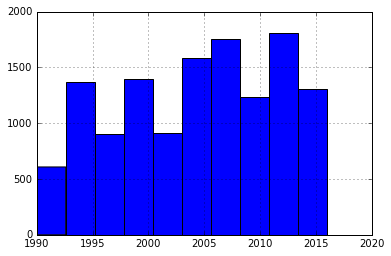

In [78]:
articles['PY'].hist()

In [93]:
#articles.to_csv(articles_1990_present_w_abstracts.csv')